In [2]:
import pandas as pd
import numpy as np

#logistic regression imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#linear regression imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#kMeanClustering imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
longitudinal_df = pd.read_csv("/Users/gabeprice/Desktop/Blackwell Research 2024/Alzheimers Research/Alhemers Dataset/oasis_longitudinal.csv")
cross_df = pd.read_csv("/Users/gabeprice/Desktop/Blackwell Research 2024/Alzheimers Research/Alhemers Dataset/oasis_cross-sectional.csv")
print(longitudinal_df.info())
print(cross_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Cou

In [4]:
print(longitudinal_df)
long_nan_values =longitudinal_df.isna()

    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.0  27.0  0.0  

In [5]:
print(long_nan_values)

     Subject ID  MRI ID  Group  Visit  MR Delay    M/F   Hand    Age   EDUC  \
0         False   False  False  False     False  False  False  False  False   
1         False   False  False  False     False  False  False  False  False   
2         False   False  False  False     False  False  False  False  False   
3         False   False  False  False     False  False  False  False  False   
4         False   False  False  False     False  False  False  False  False   
..          ...     ...    ...    ...       ...    ...    ...    ...    ...   
368       False   False  False  False     False  False  False  False  False   
369       False   False  False  False     False  False  False  False  False   
370       False   False  False  False     False  False  False  False  False   
371       False   False  False  False     False  False  False  False  False   
372       False   False  False  False     False  False  False  False  False   

       SES   MMSE    CDR   eTIV   nWBV    ASF  
0  

In [6]:
# Print the DataFrame and check for NaN values
print(cross_df)
nan_values = cross_df.isna()
print(nan_values)


                ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0    OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1    OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2    OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3    OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4    OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   
..             ...  ..  ...  ...   ...  ...   ...  ...   ...    ...    ...   
431  OAS1_0285_MR2   M    R   20   NaN  NaN   NaN  NaN  1469  0.847  1.195   
432  OAS1_0353_MR2   M    R   22   NaN  NaN   NaN  NaN  1684  0.790  1.042   
433  OAS1_0368_MR2   M    R   22   NaN  NaN   NaN  NaN  1580  0.856  1.111   
434  OAS1_0379_MR2   F    R   20   NaN  NaN   NaN  NaN  1262  0.861  1.390   
435  OAS1_0395_MR2   F    R   26   NaN  NaN   NaN  NaN  1283  0.834  1.368   

     Delay  
0      NaN  
1      NaN  
2      NaN  
3      NaN 

In [7]:

# Drop all rows that contain NaN values
cross_df_cleaned = cross_df.dropna()

cross_df_cleaned

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Map 'Group', 'Hand' and 'M/F' columns to binary values
longitudinal_df['Group_Binary'] = longitudinal_df['Group'].map({'Demented': 1, 'Nondemented': 0})
longitudinal_df['Hand_Binary'] = longitudinal_df['Hand'].map({'R': 1, 'L': 0})
longitudinal_df['Gender_Binary'] = longitudinal_df['M/F'].map({'M': 1, 'F': 0})

# Drop rows with NaN in 'Group_Binary'
longitudinal_df = longitudinal_df.dropna(subset=['Group_Binary','SES','MMSE','nWBV','Hand_Binary'])

# Define the dependent and independent variables using the binary encoded columns
X = longitudinal_df[['MMSE','nWBV','ASF','SES']]
y = longitudinal_df['Group_Binary']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Print the accuracy
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}')

# Print the classification report
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred)
print('Logistic Regression Confusion Matrix:')
print(cm_logreg)


Logistic Regression Accuracy: 0.8645833333333334
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        57
           1       0.88      0.77      0.82        39

    accuracy                           0.86        96
   macro avg       0.87      0.85      0.86        96
weighted avg       0.87      0.86      0.86        96

Logistic Regression Confusion Matrix:
[[53  4]
 [ 9 30]]


Notes for when I make a return:

I need to be able to find a linear correlation between a variable that would not be able to directly reveal dementia, but are directly correlated to the variables that ARE directly correlated with dimensia. These variables being SES, MMSE, nWBV, etc. I also then need to hope back into the photo analysis and lock in on that neural network model.

In [9]:
# Select the three columns you want to analyze
columns_of_interest = ['MMSE','nWBV','ASF','SES','Group_Binary','Hand_Binary','Gender_Binary','EDUC','Age']

# Calculate the correlation matrix for the selected columns
correlation_matrix_selected = longitudinal_df[columns_of_interest].corr()
# Print the correlation matrix for the selected columns
print("Correlation matrix for selected columns:")
print(correlation_matrix_selected)

Correlation matrix for selected columns:
                   MMSE      nWBV       ASF       SES  Group_Binary  \
MMSE           1.000000  0.370714  0.031693 -0.135219     -0.623282   
nWBV           0.370714  1.000000  0.197790  0.048502     -0.331292   
ASF            0.031693  0.197790  1.000000  0.282657      0.004759   
SES           -0.135219  0.048502  0.282657  1.000000      0.164715   
Group_Binary  -0.623282 -0.331292  0.004759  0.164715      1.000000   
Hand_Binary         NaN       NaN       NaN       NaN           NaN   
Gender_Binary -0.174880 -0.214547 -0.547144 -0.027069      0.274376   
EDUC           0.185075  0.015912 -0.252298 -0.733018     -0.220565   
Age            0.046052 -0.497126 -0.024315 -0.005012     -0.053649   

               Hand_Binary  Gender_Binary      EDUC       Age  
MMSE                   NaN      -0.174880  0.185075  0.046052  
nWBV                   NaN      -0.214547  0.015912 -0.497126  
ASF                    NaN      -0.547144 -0.252298 -0.0

From this correlation matrix, the only conclusions I can draw is that women typically have higher brain volumes (r = .547), people of higher socioeconomic status are more likely to be educated (r = .733), and nondemented brains are more likely to score higher on the mini mental state examination (r = .623). Another conclusion that can be drawn is that the older you are, the less brain tissue to total intracranial volume you will have; moreover, you lose brain tissue the older you get (r = .497)

The two highest correlated columns to demented brains are MMSE and nWBV. I will now look at those individual columns correlation to other columns to try and find the best predictors of dementia.

Mean Squared Error: 13.41926454831435
R-squared: 0.2052327594399055


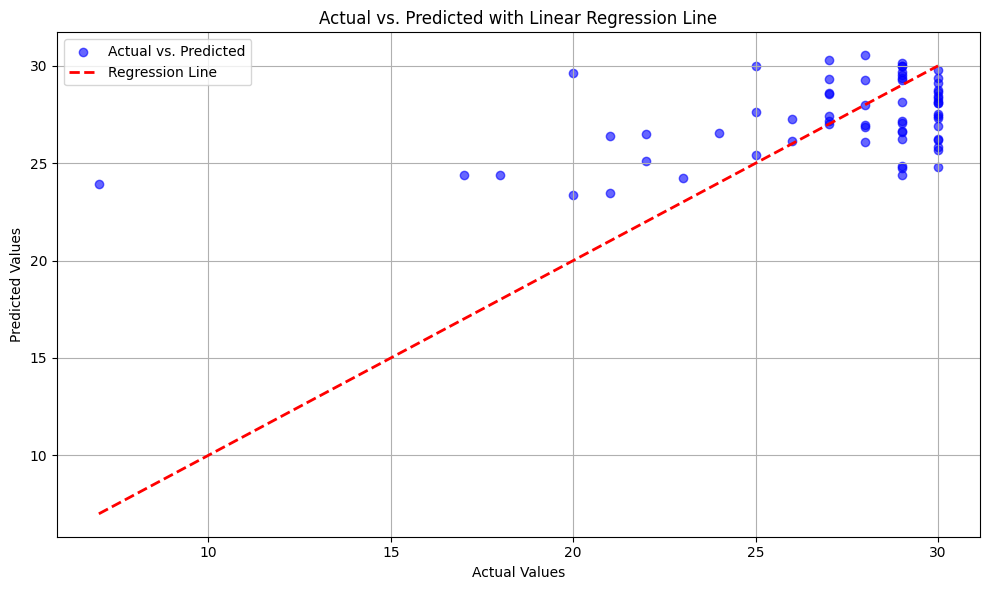

In [10]:

# Assuming 'df' is your DataFrame with features and target
X = longitudinal_df[['Age','SES','nWBV']]
y = longitudinal_df['MMSE']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot actual vs. predicted values with linear regression line
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs. Predicted')

# Plotting the regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted with Linear Regression Line')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# Ensure there are no NaN values
longitudinal_df.dropna(inplace=True)

# Define the feature matrix X and target variable y
X = longitudinal_df[['MMSE', 'ASF', 'nWBV', 'EDUC']]
y = longitudinal_df['Group_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
test_predictions_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model using the test set
accuracy_knn = accuracy_score(y_test, test_predictions_knn)
print(f'KNN Accuracy: {accuracy_knn}')
print('KNN Classification Report:')
print(classification_report(y_test, test_predictions_knn))

# Print the confusion matrix
cm_knn = confusion_matrix(y_test, test_predictions_knn)
print('KNN Confusion Matrix:')
print(cm_knn)

KNN Accuracy: 0.875
KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90        37
         1.0       0.95      0.74      0.83        27

    accuracy                           0.88        64
   macro avg       0.89      0.86      0.87        64
weighted avg       0.89      0.88      0.87        64

KNN Confusion Matrix:
[[36  1]
 [ 7 20]]


After trial and error, these four variables give me the highest accuracy and most accurate confusion matrix. Moreover, these independent variables lead to the lowest amount of false positives and false negatives.

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ensure there are no NaN values
longitudinal_df.dropna(inplace=True)

# Define the feature matrix X
X = longitudinal_df[['MMSE', 'ASF', 'nWBV', 'EDUC']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KMeans with the number of clusters you want (e.g., 2 for demented and non-demented)
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to your data
kmeans.fit(X_scaled)

# Get cluster assignments
labels = kmeans.labels_

# Add the cluster assignments to the DataFrame
longitudinal_df['Cluster'] = labels

# Print the cluster centers
print('Cluster Centers:')
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Evaluate the clusters by comparing with the actual 'Group_Binary' values
print('Cluster Assignments vs. Actual Groups:')
print(pd.crosstab(longitudinal_df['Cluster'], longitudinal_df['Group_Binary']))

# Print cluster labels for first few rows
print(longitudinal_df.head())


Cluster Centers:
[[27.31967213  1.06685246  0.71381148 16.67213115]
 [27.22564103  1.26965641  0.74109744 13.32820513]]
Cluster Assignments vs. Actual Groups:
Group_Binary    0   1
Cluster              
0              76  46
1             114  81
  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
5  OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F    R   88    18   
6  OAS2_0004  OAS2_0004_MR2  Nondemented      2       538   F    R   90    18   
7  OAS2_0005  OAS2_0005_MR1  Nondemented      1         0   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  Group_Binary  Hand_Binary  \
0  2.0  27.0  0.0  1987  0.696  0.883             0            1   
1  2.0  30.0  0.0  2004  0.681  0.876             0            1   
5  3.0  28.0  0.0  1215  0.710  1.444             0           